<h1 style="color:#3a7aad">Traffic Light Detection</h1>

<h2 style="color:#3a7aad">Dataset Reference</h2>

* https://github.com/vatsl/TrafficLight_Detection-TensorFlowAPI

In [23]:
# !pip install --no-deps tensorflow==1.15.3
# !pip install --no-deps keras==2.2.4

In [24]:
import yaml
import numpy as np
import pprint
import matplotlib.pyplot as plt
import cv2
from helpers import *

In [25]:
with open("./dataset-sdcnd-capstone/data/sim_training_data/sim_data_annotations.yaml", "r") as yamlfile:
    data = yaml.load(yamlfile, Loader=yaml.FullLoader)
    print("Read successful")
    print(f"Located {len(data)} annotations")

Read successful
Located 277 annotations


<h2 style="color:#3a7aad">Sample Annotation</h2>

In [26]:
selected_index = 20
pp = pprint.PrettyPrinter(width=41, compact=True)
pp.pprint(data[selected_index])

{'annotations': [{'class': 'Red',
                  'x_width': 70.08,
                  'xmin': 43.84,
                  'y_height': 162.24,
                  'ymin': 149.76},
                 {'class': 'Red',
                  'x_width': 72.0,
                  'xmin': 379.52,
                  'y_height': 168.64000000000001,
                  'ymin': 153.28},
                 {'class': 'Red',
                  'x_width': 72.00000000000011,
                  'xmin': 721.92,
                  'y_height': 167.67999999999998,
                  'ymin': 158.08}],
 'class': 'image',
 'filename': 'sim_data_capture/left0030.jpg'}


<h2 style="color:#3a7aad">Sample Image</h2>

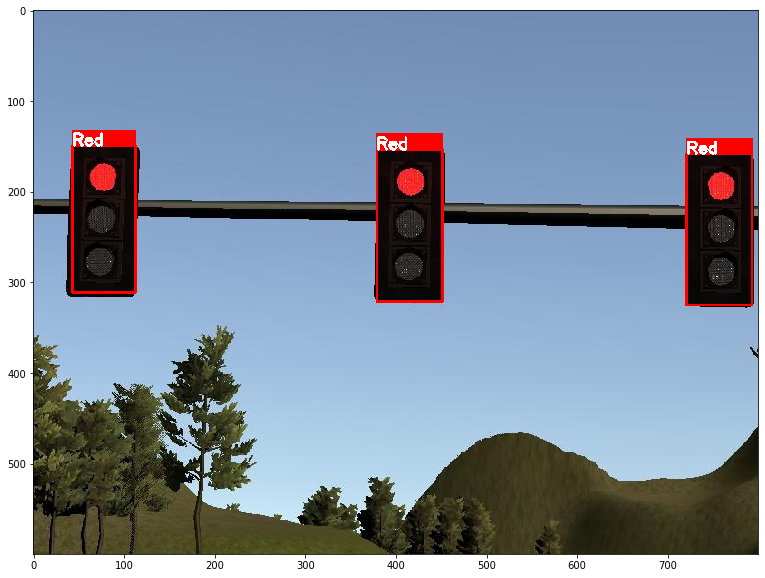

In [27]:
image_sample = cv2.imread(f"./dataset-sdcnd-capstone/data/sim_training_data/{data[selected_index]['filename']}")
image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)

for i in range(len(data[selected_index]['annotations'])):
    w = int(data[selected_index]['annotations'][i]['x_width'])
    h = int(data[selected_index]['annotations'][i]['y_height'])
    
    x = int(data[selected_index]['annotations'][i]['xmin'])
    y = int(data[selected_index]['annotations'][i]['ymin'])
    
    label = data[selected_index]['annotations'][i]['class']

    cv2.rectangle(image_sample, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.rectangle(image_sample, (x, y), (int(x+w), int(y-0.1*h)), (255, 0, 0), -1)
    cv2.putText(image_sample, label, (x, y), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, 
                (255, 255, 255), 2)

plt.figure(figsize=(15,10))
plt.imshow(image_sample)

In [28]:
filenames = []
for i in range(len(data)):
    filenames.append(int(data[i]['filename'][-8:-4]))

In [29]:
#  # prepare train set
# train_set = TrafficLightDataset()
# train_set.load_dataset('traffic', is_train=True)
# train_set.prepare()
# print('Train: %d' % len(train_set.image_ids))
# # prepare test/val set
# test_set = TrafficLightDataset()
# test_set.load_dataset('traffic', is_train=False)
# test_set.prepare()
# print('Test: %d' % len(test_set.image_ids))
# # prepare config
# config = TrafficConfig()
# config.display()
# # define the model
# model = MaskRCNN(mode='training', model_dir='./', config=config)
# # load weights (mscoco) and exclude the output layers
# model.load_weights('./weights/mask_rcnn_coco.h5', by_name=True,
#                    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc",  "mrcnn_bbox", "mrcnn_mask"])
# # train weights (output layers or 'heads')
# model.train(train_set, test_set, learning_rate=config.LEARNING_RATE, epochs=5, layers='heads')

# model.save('./model_detect.h5')

In [30]:
# define the prediction configuration
class PredictionConfig(Config):
  # define the name of the configuration
  NAME = "traffic_cfg"
  # number of classes (background + lights)
  NUM_CLASSES = 1 + 3
  # simplify GPU config
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1
  BATCH_SIZE = 1

# create config
cfg = PredictionConfig()
# define the model
model = MaskRCNN(mode='inference', model_dir='./', config=cfg)

In [31]:
# load model weights
model.load_weights('./weights/mask_rcnn_traffic_cfg_0005.h5', by_name=True)

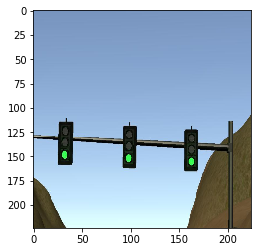

In [57]:
image_sample = cv2.imread(f"./dataset-sdcnd-capstone/data/sim_training_data/{data[200]['filename']}")
image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)
image_sample = cv2.resize(image_sample, (224, 224))
plt.imshow(image_sample)

In [58]:
import time 
start_time = time.time()
yhat = model.detect([image_sample], verbose=0)
# print(yhat[0]['rois'])
# print(yhat[0]['scores'])
# print(yhat[0]['class_ids'])
print(time.time() - start_time)

1.8254990577697754


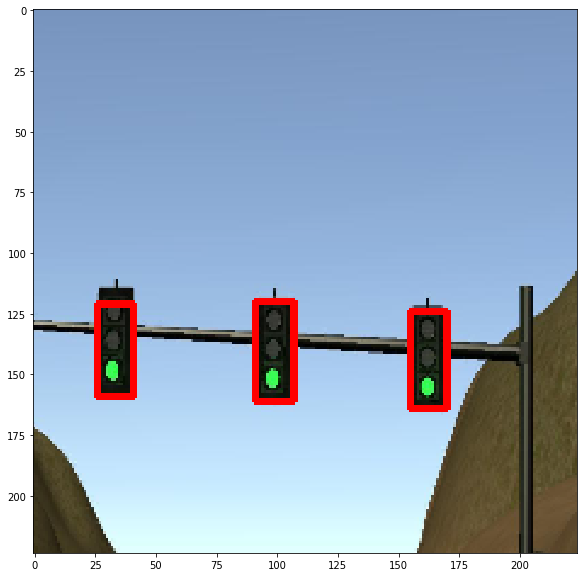

In [59]:
image_sample = cv2.imread(f"./dataset-sdcnd-capstone/data/sim_training_data/{data[200]['filename']}")
image_sample = cv2.cvtColor(image_sample, cv2.COLOR_BGR2RGB)
image_sample = cv2.resize(image_sample, (224, 224))

boxes = yhat[0]['rois']
for box in boxes:
  cv2.rectangle(image_sample, (box[3], box[2]), (box[1], box[0]), (255, 0, 0), 2)

plt.figure(figsize=(15,10))
plt.imshow(image_sample)

In [62]:
cap = cv2.VideoCapture('./Data/raw/raw1.mov')

frames = []
counter = 0

while(True):
    # Read one frame.
    ret, frame = cap.read()
    if not ret:
        break
        
    frame = cv2.resize(frame, (224, 224))
    
    if counter % 15 == 0:
        
        yhat = model.detect([frame], verbose=0)

        boxes = yhat[0]['rois']
        for box in boxes:
          cv2.rectangle(frame, (box[3], box[2]), (box[1], box[0]), (255, 0, 0), 2)

        frames.append(frame)
        print(counter)
    counter += 1

cap.release()
cv2.destroyAllWindows()

0
15
30
45
60
75
90
105
120
135
150
165
180
195
210
225
240
255
270
285
300
315
330
345
360
375
390
405
420
435
450
465
480
495
510
525
540
555
570
585
600
615
630
645
660
675
690
705
720
735
750
765
780
795
810
825
840
855
870
885
900
915
930
945
960
975
